In [ ]:
'''Data Exploration
Using the data set, audio files by plotting out the waveform and a spectrogram to see the sample audio files.'''
import librosa
import librosa.display
import numpy as np
import pandas as pd

import os
import sys
import glob
import numpy as np
import librosa
from scipy.io import wavfile

import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


In [ ]:
!pip install Pydrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import glob
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'20 shore breeze dr'    heli		      Shadi
'Anuj EI forms'        'Lunar Eclipse'	      Sponsor
'Assignment 1'	       'Mom- Dad'	      Stocks
'Colab Notebooks'      'Niagara Falls 2020'   swati
'Condo Lease'	       'Python Tutorial 1'    Tax
 creditcard_csv.csv     Rainbow		     'Titanic dataset'
 foo.txt	        RawData
'Getting started.pdf'   Resume


In [ ]:
currentDir= !pwd
print(currentDir)

['/content']


In [ ]:
import os
os.chdir("/content/drive/My Drive/RawData/csv") #change the current directory to the location where audio files are saved


In [ ]:
df = pd.read_csv('emotion_capstone_final_dataframe_Anuj_Goyal.csv')

In [ ]:
df.shape

(2840, 42)

In [ ]:
df = pd.DataFrame(data=df)

In [ ]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion
0,0,-654.646232,62.781853,7.932358,16.870620,7.546799,0.171592,-0.967256,-4.823879,-5.119983,-0.340537,1.315475,-1.757971,-2.989802,-0.862581,-2.785877,2.663070,-4.215669,-0.724833,1.933007,1.853694,-3.237265,1.222343,-3.246682,0.644855,-3.304615,3.795769,-2.665265,1.372971,-1.486757,1.649872,-1.620007,-0.006297,-0.528543,-0.056369,0.427541,0.733942,-1.275578,-2.495056,-2.258630,-0.545591,happy
1,1,-567.908356,85.874656,-7.398332,10.750098,15.468099,-0.139188,-7.602773,-12.398383,-4.646946,3.856019,-1.317298,-2.136567,-2.838887,1.975066,4.372065,0.226558,-4.154083,0.189507,-0.221705,-4.985999,-4.308796,1.247384,-3.211161,2.054119,-2.544459,0.533317,-0.787071,3.167388,-2.772789,2.426496,-0.362056,2.760451,1.041390,0.803652,-0.136307,3.280757,0.193704,3.405405,0.915592,2.547960,disgust
2,2,-493.515312,40.814304,-8.818245,-0.750032,-9.281286,1.027561,-19.635959,-9.025187,-11.519163,-6.699906,-2.519452,-8.935852,-3.438269,-6.125118,-9.093466,-0.694109,-10.602784,-0.686189,-0.470516,-2.354010,-3.115871,-1.026986,-3.725992,-0.534976,-3.332869,4.491082,2.613269,7.781351,6.574320,7.600558,2.514673,1.216024,-0.755386,0.758329,2.090533,5.613742,0.696761,0.369092,-1.450318,0.808130,happy
3,3,-646.588492,72.096458,-6.729647,10.288183,9.891728,1.484332,-6.563381,-4.412591,-11.998619,0.801728,1.671890,-5.389615,4.677048,-1.064298,-8.952511,3.835450,-7.966398,-0.966183,2.335589,-4.098636,-2.828897,0.262527,-3.017115,0.897450,-0.385179,-1.169752,0.785712,1.130536,-2.062415,3.309754,-1.586862,-0.783219,-0.880376,2.374817,-1.738691,2.796475,-2.953907,-0.946455,-3.217665,-0.327552,happy
4,4,-624.292056,70.962872,3.665651,16.811285,4.451512,-11.441690,-9.784933,-4.133363,-1.330535,-3.853919,-1.822135,-1.979291,0.055829,-4.985742,1.651275,-3.273161,-6.651623,0.391306,-5.624713,-1.329120,-9.522869,-1.237839,-4.752450,-3.354396,-2.785206,-1.425296,-4.595281,0.284062,-5.786546,-3.488191,-4.603002,-0.855088,-2.517412,-0.210755,-1.567468,-2.994783,-4.074555,0.589294,-0.511694,2.391962,disgust


In [ ]:
df.set_index('Unnamed: 0')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-654.646232,62.781853,7.932358,16.870620,7.546799,0.171592,-0.967256,-4.823879,-5.119983,-0.340537,1.315475,-1.757971,-2.989802,-0.862581,-2.785877,2.663070,-4.215669,-0.724833,1.933007,1.853694,-3.237265,1.222343,-3.246682,0.644855,-3.304615,3.795769,-2.665265,1.372971,-1.486757,1.649872,-1.620007,-0.006297,-0.528543,-0.056369,0.427541,0.733942,-1.275578,-2.495056,-2.258630,-0.545591,happy
1,-567.908356,85.874656,-7.398332,10.750098,15.468099,-0.139188,-7.602773,-12.398383,-4.646946,3.856019,-1.317298,-2.136567,-2.838887,1.975066,4.372065,0.226558,-4.154083,0.189507,-0.221705,-4.985999,-4.308796,1.247384,-3.211161,2.054119,-2.544459,0.533317,-0.787071,3.167388,-2.772789,2.426496,-0.362056,2.760451,1.041390,0.803652,-0.136307,3.280757,0.193704,3.405405,0.915592,2.547960,disgust
2,-493.515312,40.814304,-8.818245,-0.750032,-9.281286,1.027561,-19.635959,-9.025187,-11.519163,-6.699906,-2.519452,-8.935852,-3.438269,-6.125118,-9.093466,-0.694109,-10.602784,-0.686189,-0.470516,-2.354010,-3.115871,-1.026986,-3.725992,-0.534976,-3.332869,4.491082,2.613269,7.781351,6.574320,7.600558,2.514673,1.216024,-0.755386,0.758329,2.090533,5.613742,0.696761,0.369092,-1.450318,0.808130,happy
3,-646.588492,72.096458,-6.729647,10.288183,9.891728,1.484332,-6.563381,-4.412591,-11.998619,0.801728,1.671890,-5.389615,4.677048,-1.064298,-8.952511,3.835450,-7.966398,-0.966183,2.335589,-4.098636,-2.828897,0.262527,-3.017115,0.897450,-0.385179,-1.169752,0.785712,1.130536,-2.062415,3.309754,-1.586862,-0.783219,-0.880376,2.374817,-1.738691,2.796475,-2.953907,-0.946455,-3.217665,-0.327552,happy
4,-624.292056,70.962872,3.665651,16.811285,4.451512,-11.441690,-9.784933,-4.133363,-1.330535,-3.853919,-1.822135,-1.979291,0.055829,-4.985742,1.651275,-3.273161,-6.651623,0.391306,-5.624713,-1.329120,-9.522869,-1.237839,-4.752450,-3.354396,-2.785206,-1.425296,-4.595281,0.284062,-5.786546,-3.488191,-4.603002,-0.855088,-2.517412,-0.210755,-1.567468,-2.994783,-4.074555,0.589294,-0.511694,2.391962,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,-430.551648,76.453812,0.706875,-22.594664,-11.195444,9.193154,-11.556047,-6.062422,-19.613249,-5.513640,-9.826813,11.298777,2.591715,4.987994,2.482249,1.446587,-8.441308,-10.638935,-2.497791,-6.309361,-2.956411,10.332902,3.567046,19.971330,24.255430,22.128802,14.562678,12.853157,6.012709,9.560472,5.249291,7.982080,4.041409,-3.451922,3.174056,2.301453,1.306520,5.732609,-4.113690,2.596133,angry
2836,-511.684494,95.933504,18.573938,10.469868,12.143921,4.489385,-10.903155,-10.117383,-13.947479,-1.806496,-16.936192,-0.327894,-8.403786,-0.190460,11.873775,4.975132,-3.368934,9.053101,-5.810099,0.470214,4.596726,0.015281,-3.126147,-1.676719,-14.931509,1.945316,-8.150734,-2.287409,-4.663765,-1.307434,-8.462994,-1.553091,1.622921,10.708711,25.092993,30.037151,35.721115,27.667574,15.559804,7.605955,neutral
2837,-465.940105,104.936139,26.300862,-0.066423,-0.500028,1.382315,-6.894684,-4.677826,-21.012488,-7.276802,-13.131298,-14.730646,-5.505578,-4.043246,-3.413230,6.183374,-3.819701,11.438957,-4.821720,-2.637787,-2.092882,5.024794,0.389573,8.021379,1.335015,5.224194,-2.670214,5.241774,-1.433338,7.676582,0.270697,3.051094,1.965710,-1.233770,0.618321,5.508082,4.742647,14.265531,11.437599,16.013127,happy


<function matplotlib.pyplot.figure>

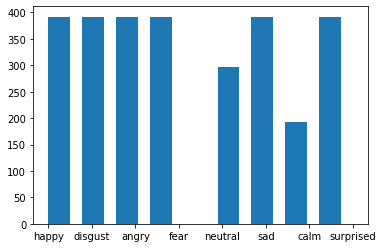

In [ ]:
plt.figure()
plt.hist(df['emotion'], bins=9, width=0.5)
plt.figure

In [ ]:
fd = os.getcwd()
fd

'/content/drive/My Drive/RawData/csv'

** The csv was created by combining both the csvs RAVDESS & TESS**

In [ ]:
sample_file = '03-01-01-01-01-01-01.wav'

In [ ]:
#sample 
#librosa.core.load(path, sr=22050, mono=True, offset=0.5, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
res_type_s = 'kaiser_best'
duration_s = None
sample_rate_s = 22050
offset_s = 0.5

#Mfcc
#librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
mfcc_sample_rate = 22050
n_feat = 13
n_mfcc = 40 #number of MFCCs to return => number of features
n_fft = 552
window = 0.4
test_shift = 0.1
duration = 2.5
axis_mfcc = 1 #axis =0 means along the columns and axis =1 along the row

In [ ]:
#X = audio time series
#sample_rate = sampling rate of X

X,sample_rate = librosa.load(sample_file, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset = offset_s,
                                 mono=False)

print(X)
print(sample_rate)

[0. 0. 0. ... 0. 0. 0.]
22050


In [ ]:
time = np.arange(0,len(X))/sample_rate
print(time) # prints timeline

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 2.80317460e+00
 2.80321995e+00 2.80326531e+00]


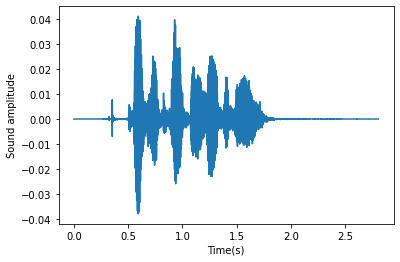

In [ ]:
fig, ax = plt.subplots()
ax.plot(time,X)
ax.set(xlabel='Time(s)',ylabel='Sound amplitude')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
///
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


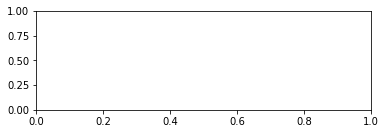

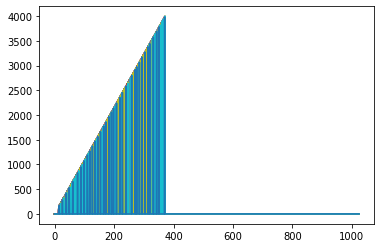

In [ ]:
pitches, magnitudes = librosa.piptrack(y=X, sr=sample_rate)
print(pitches)
print('///')
print(magnitudes)
plt.subplot(212)
plt.show()
plt.plot(pitches)
plt.show()

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

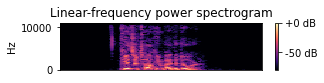

In [ ]:
y, sr = librosa.load(sample_file)
plt.figure(figsize=(10, 4))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [ ]:
librosa_audio, librosa_sample_rate = librosa.load(sample_file)

mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 143)


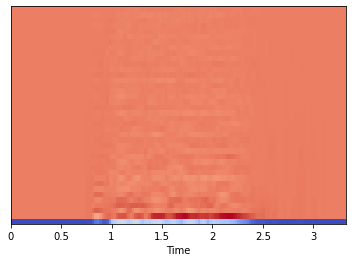

In [ ]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

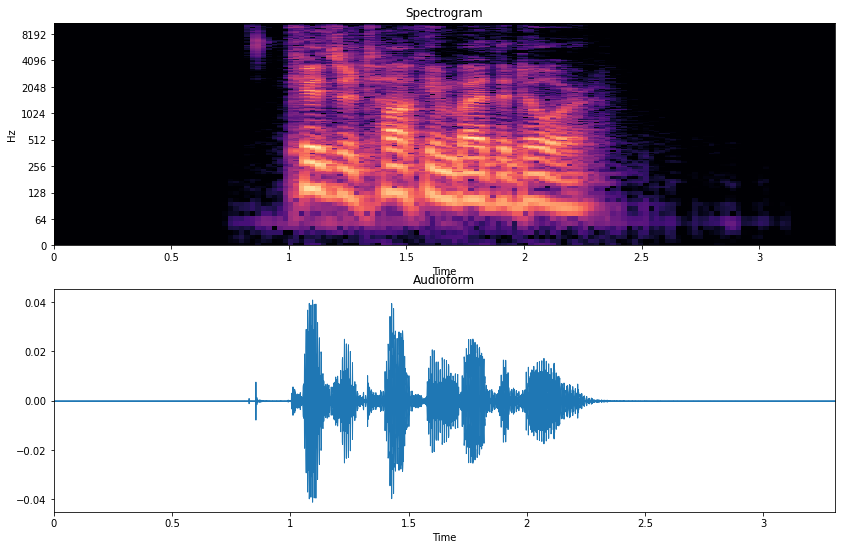

In [ ]:
plt.figure(figsize=(14, 9))

plt.figure(1)

plt.subplot(211)
plt.title('Spectrogram')
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, x_axis='time', y_axis='log')

plt.subplot(212)
plt.title('Audioform')
librosa.display.waveplot(y, sr=sr)

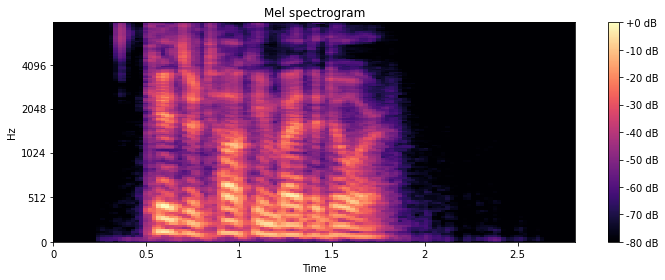

In [ ]:
librosa.feature.melspectrogram(y=X, sr=sample_rate)

D = np.abs(librosa.stft(X))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

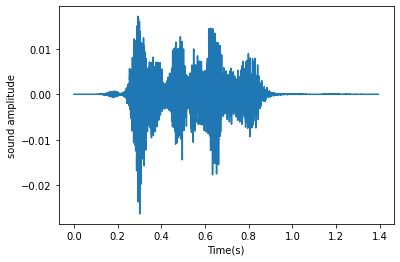

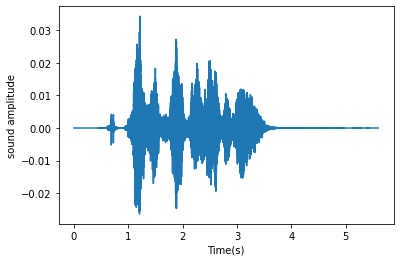

In [ ]:
y_fast = librosa.effects.time_stretch(X, 2.0)
time = np.arange(0,len(y_fast))/sample_rate
fig, ax = plt.subplots()
ax.plot(time,y_fast)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#compress to be twice as fast

y_slow = librosa.effects.time_stretch(X, 0.5)
time = np.arange(0,len(y_slow))/sr
fig, ax = plt.subplots()
ax.plot(time,y_slow)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#half the original speed

In [ ]:
S = np.abs(librosa.stft(X))
S

array([[2.39441088e-05, 2.06736568e-05, 1.06406942e-05, ...,
        1.05260755e-04, 1.82469885e-04, 6.62424718e-05],
       [1.93388109e-06, 2.16296012e-05, 1.70148105e-05, ...,
        1.22340978e-04, 1.92596752e-04, 7.88209290e-05],
       [1.78216924e-05, 2.16290264e-05, 9.34407853e-06, ...,
        1.01623955e-04, 2.24794043e-04, 1.07274056e-04],
       ...,
       [1.53039021e-08, 5.87567470e-08, 7.87372514e-08, ...,
        4.44538202e-08, 1.23720582e-07, 6.61171740e-08],
       [2.05001758e-08, 2.15476881e-08, 3.22811253e-08, ...,
        7.20374302e-08, 1.16945586e-07, 5.08142186e-08],
       [7.01882019e-09, 3.22608962e-09, 2.21636540e-08, ...,
        7.23087581e-08, 1.19589330e-07, 4.72565169e-08]], dtype=float32)

In [ ]:
#lms = librosa.power_to_db(S)
#lms

log_S = librosa.amplitude_to_db(S, ref=np.max)

In [ ]:
from librosa.core import istft
vocals = istft(log_S)

In [ ]:
mfccs_test = librosa.feature.mfcc(y=vocals, sr = mfcc_sample_rate, n_mfcc = n_mfcc)
mfccs_test

array([[-820.71940414, -820.71940414, -820.71940414, ..., -820.71940414,
        -820.71940414, -820.71940414],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [ ]:
mfccs_final = np.mean(mfccs_test,axis = axis_mfcc)
mfccs_final

array([-3.52442476e+02,  5.21548267e+01,  2.45264398e+01,  1.93507457e+01,
        9.55487045e+00,  8.19201049e+00,  5.05950051e+00,  5.52011811e+00,
       -3.77345709e+00,  3.00064377e+00,  2.21882669e+00,  4.62821131e+00,
        4.62022721e+00,  1.40752107e+00,  3.69385511e+00,  1.02453711e+00,
       -2.49143701e+00,  7.86807758e-01, -1.62729893e+00,  2.08219894e+00,
       -4.33060350e+00,  7.10541494e-02, -2.46113636e+00,  1.12899081e+00,
       -3.92931631e-01,  7.44869300e-01, -2.48011577e+00,  1.13742952e+00,
        5.83575170e-01,  3.70037270e+00,  1.95295350e-01,  1.46048806e+00,
       -1.48262980e+00,  2.30335851e+00,  9.01389904e-01,  3.70162584e-01,
       -1.53544593e+00,  3.76579241e-01, -9.02206685e-01,  1.43106290e+00])

In [ ]:
S = np.abs(librosa.stft(X))
lms = librosa.power_to_db(S**2)
    #lms = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=X,sr=sample_rate))
vocal = istft(lms)    #convert them back to an audio sample using inverse STFT.
mfccs = np.mean(librosa.feature.mfcc(y=vocal, 
                                     sr = mfcc_sample_rate, 
                                     n_mfcc = n_mfcc),
                                     axis = axis_mfcc)


In [ ]:
sample_rate = np.array(sample_rate)
sample_rate

array(22050)

In [ ]:
print(f"n_mfcc = {n_mfcc}")
print(f"sr = {mfcc_sample_rate}")

z = librosa.feature.mfcc(X, sr = mfcc_sample_rate, n_mfcc = n_mfcc)
for x in z:
    print(x)

n_mfcc = 40
sr = 22050
[-860.15278387 -860.15278387 -860.15278387 -860.15278387 -860.15278387
 -860.15278387 -860.15278387 -860.15278387 -860.15278387 -860.15278387
 -857.16778569 -854.77849733 -854.82368152 -842.06719418 -784.79193756
 -747.00503047 -758.94823478 -815.80788756 -830.10233281 -816.85993443
 -794.00206235 -556.11144491 -472.75116584 -448.40992299 -403.36165577
 -392.71236165 -394.13153424 -415.30950386 -462.08988706 -458.12162445
 -415.30379162 -386.66003645 -395.78792831 -426.69670351 -513.36730275
 -475.92634317 -446.09251506 -462.0623595  -454.67350535 -422.05560439
 -415.98484829 -406.72819708 -395.14955363 -435.26456767 -501.72905382
 -515.65479571 -487.47051248 -448.91374302 -447.70985269 -480.41948246
 -524.86416895 -556.26291912 -524.114802   -452.46355835 -426.71433691
 -419.88860114 -420.25102603 -457.13510445 -542.29766324 -533.2989463
 -471.14054838 -477.25487995 -557.88427985 -537.82158187 -471.7905928
 -465.09162688 -476.62863804 -493.01968187 -507.16093596

In [ ]:
mfccs = np.mean(z, axis=1)
mfccs

array([-6.70430187e+02,  6.54632359e+01,  4.88221893e-01,  1.51170035e+01,
        8.78338868e+00,  1.05639529e+00, -4.24067686e+00, -3.19304375e+00,
       -1.33462658e+01, -2.91773508e+00,  5.33757265e-01, -3.22628273e+00,
        2.01052967e+00, -4.03001122e+00,  1.93809095e-01,  1.23537835e+00,
       -5.13825473e+00, -1.77801103e+00, -1.92443859e+00, -7.43672121e-01,
       -7.36661777e+00, -3.33263480e-01, -3.00787972e+00, -5.03824482e+00,
       -2.22747648e+00, -6.98162729e-01, -5.95820809e+00,  5.59071307e-01,
       -2.75851188e+00,  3.85549473e-01, -2.54345221e+00, -2.32363864e+00,
       -3.32101387e+00, -2.03303256e+00, -3.94900168e+00, -1.67733482e+00,
       -1.38589902e+00, -2.03100642e+00, -4.25526888e+00, -1.68693165e+00])

(0.0, 1.0, 40.0, 0.0)

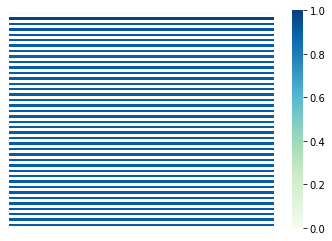

In [ ]:
import numpy as np
import seaborn as sns
# Put this into a heatmap
_min = np.amin(mfccs)
_max = np.amax(mfccs)
mfcc = (mfccs - _min) / (_max - _min)



plt.figure(figsize = (6,4))
sns.heatmap(mfcc[:, np.newaxis], cmap='GnBu', linewidth =2)
#sns.heatmap(mfcc, cmap = 'RGBA', linewidth = 1)
plt.axis('off')

In [ ]:
y,sr = librosa.load(sample_file)
print(librosa.get_duration(filename=sample_file))
print(librosa.get_duration(y=y,sr=sr))

3.3032916666666665
3.3033106575963718
